# **Final Project Pelatihan FGA DTS 2023 - BDP SAMRAT B - Kelompok 1**

### Anggota Kelompok

*   Adittya Kamal Mahardin
*   Renny Kurniasari
*   Theresia Rosaria
*   Tegar Kamarulzaman
*   Semmy Vigmendelson K

# Objective

## Case Objective

*   How much sales for each category ?
*   How much the average order value for each year ?
*   Which category & product makes the most profit ?
*   Which product had worst growth in books category for each year ?
*   Who are the best customers?
*   Who has the potential to become valuable customers?

## Data Dictionary

Source: https://www.kaggle.com/datasets/rennykurniasari/e-commerce-dataset

> **Order Detail**

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran

> **SKU Detail**

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk

> **Customer Detail**

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota

> **Payment Detail**

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


# Data PREPROCESSING

## Libraries Import

In [168]:
# Import necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

# Libraries for interactive dashboard
import panel as pn
pn.extension()
import datetime as dt
import hvplot.pandas
import plotly.express as px
import holoviews as hv
import plotly.graph_objects as go
from holoviews import opts

## Data Load

In [169]:
# Load 4 Dataset dari Github
order_url = "https://raw.githubusercontent.com/rennykurniasari/e_commerce/main/e_commerce_dataset/order_detail.csv"
payment_url = "https://raw.githubusercontent.com/rennykurniasari/e_commerce/main/e_commerce_dataset/payment_detail.csv"
customer_url = "https://raw.githubusercontent.com/rennykurniasari/e_commerce/main/e_commerce_dataset/customer_detail.csv"
sku_url = "https://raw.githubusercontent.com/rennykurniasari/e_commerce/main/e_commerce_dataset/sku_detail.csv"

# Mengubah data menjadi DataFrame
df_order = pd.read_csv(order_url)
df_payment = pd.read_csv(payment_url)
df_customer = pd.read_csv(customer_url)
df_sku = pd.read_csv(sku_url)

## Data Understanding

In [170]:
# Menghitung jumlah baris pada dataframe detail oder
order_rows = len(df_order.axes[0])
print("Total baris yang terdapat pada dataframe detail order : ", order_rows)

Total baris yang terdapat pada dataframe detail order :  287249


In [171]:
# Menghitung jumlah baris pada dataframe detail payment
payment_rows = len(df_payment.axes[0])
print("Total baris yang terdapat pada dataframe payment order : ", payment_rows)

Total baris yang terdapat pada dataframe payment order :  16


In [172]:
# Menghitung jumlah baris pada dataframe detail customer
customer_rows = len(df_customer.axes[0])
print("Total baris yang terdapat pada dataframe customer order : ", customer_rows)

Total baris yang terdapat pada dataframe customer order :  58013


In [173]:
# Menghitung jumlah baris pada dataframe detail SKU
sku_rows = len(df_sku.axes[0])
print("Total baris yang terdapat pada dataframe sku : ", sku_rows)

Total baris yang terdapat pada dataframe sku :  36554


## Duplicate Data Checking

In [174]:
# Menemukan semua duplikat pada order detail pada semua kolom
df_order.duplicated().values.any()

True

In [175]:
# Duplikasi berdasarkan seluruh kolom
duplicate_order = df_order[df_order.duplicated()]

print("Baris yang mengandung duplikasi :")
duplicate_order

Baris yang mengandung duplikasi :


,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
43,ODR7562324344j,C996508L,2021-08-16,P951429,15950,1,15950.0,0.0,15950.0,1,1,1,1
54,ODR7235873053g,C996508L,2021-08-31,P968632,1480160,1,1480160.0,0.0,1480160.0,1,0,0,1
57,ODR6390082209c,C996508L,2021-05-09,P552624,8120,1,8120.0,0.0,8120.0,1,1,1,1
71,ODR5801007443l,C996508L,2021-09-28,P406949,1913942,1,1913942.0,382788.4,1531153.6,1,0,0,4
75,ODR8558093144a,C996508L,2021-09-29,P406949,1913942,1,1913942.0,382788.4,1531153.6,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287090,ODR8179728139f,C912346L,2022-08-13,P114299,10440,1,10440.0,0.0,10440.0,1,0,0,4
287144,ODR4376249812c,C905264L,2022-08-13,P118623,49300,3,147900.0,51765.0,96135.0,1,1,1,4
287154,ODR1657792137t,C972206L,2022-08-13,P255913,1129840,1,1129840.0,0.0,1129840.0,1,0,0,4
287155,ODR1657792137t,C972206L,2022-08-13,P675319,858690,1,858690.0,0.0,858690.0,1,0,0,4


In [176]:
# menemukan semua duplikat pada order detail pada semua kolom
df_payment.duplicated().values.any()

False

In [177]:
# menemukan semua duplikat pada order detail pada semua kolom
df_customer.duplicated().values.any()

False

In [178]:
# menemukan semua duplikat pada order detail pada semua kolom
df_sku.duplicated().values.any()

False

## Null Value Checking

In [179]:
df_order.isnull().sum()

id                 0
customer_id        0
order_date         0
sku_id             0
price              0
qty_ordered        0
before_discount    0
discount_amount    0
after_discount     0
is_gross           0
is_valid           0
is_net             0
payment_id         0
dtype: int64

In [180]:
df_payment.isnull().sum()

id                0
payment_method    0
dtype: int64

In [181]:
df_customer.isnull().sum()

id                 0
registered_date    0
dtype: int64

In [182]:
df_sku.isnull().sum()

id            0
sku_name      0
base_price    0
cogs          0
category      0
dtype: int64

# DATA PREPARATION

## Remove Duplicate Data

In [183]:
# Menghapus baris duplikat berdasarkan seluruh kolom, dan simpan baris pertama yang terdeteksi duplikat
df_order = df_order.drop_duplicates(keep='first')

In [184]:
# Menemukan semua duplikat pada order detail pada semua kolom
df_order.duplicated().values.any()

False

In [185]:
# Menghitung jumlah baris pada dataframe detail oder
order_rows = len(df_order.axes[0])
print("Total baris yang terdapat pada tabel detail order : ", order_rows)

Total baris yang terdapat pada tabel detail order :  250498


## Merge the Data for Data Analysis

In [186]:
#Menjalankan SQL
from sqlite3 import connect
conn = connect(':memory:')
df_order.to_sql('order_detail',conn, index=False, if_exists='replace')
df_payment.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sku.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_customer.to_sql('customer_detail', conn, index=False, if_exists='replace')

58013

In [187]:
# query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [188]:
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100.0,0.0,113100.0,1,1,1,1,cod,kreations_YI 06-L,113100.0,92742,Women Fashion,2021-07-16
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920.0,0.0,13920.0,1,0,0,1,cod,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,13920.0,10266,Beauty & Grooming,2021-07-15
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660.0,0.0,15660.0,1,0,0,2,jazzvoucher,RS_Habshi Halwa Tin,15660.0,12992,Soghaat,2021-07-15
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100.0,0.0,142100.0,1,0,0,1,cod,Ego_UP0017-999-MR0,142100.0,85260,Women Fashion,2021-07-28
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740.0,0.0,30740.0,1,1,1,1,cod,BT_BT-422,30740.0,26738,Men Fashion,2021-07-28


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250498 entries, 0 to 250497
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               250498 non-null  object 
 1   customer_id      250498 non-null  object 
 2   order_date       250498 non-null  object 
 3   sku_id           250498 non-null  object 
 4   price            250498 non-null  int64  
 5   qty_ordered      250498 non-null  int64  
 6   before_discount  250498 non-null  float64
 7   discount_amount  250498 non-null  float64
 8   after_discount   250498 non-null  float64
 9   is_gross         250498 non-null  int64  
 10  is_valid         250498 non-null  int64  
 11  is_net           250498 non-null  int64  
 12  payment_id       250498 non-null  int64  
 13  payment_method   250498 non-null  object 
 14  sku_name         250498 non-null  object 
 15  base_price       250498 non-null  float64
 16  cogs             250498 non-null  int6

## Data Type Conversion

In [190]:
# Convert tipe data menjadi integer
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
# Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])

# DATA ANALYSIS

In [191]:
#Menampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100,0,113100,1,1,1,1,cod,kreations_YI 06-L,113100,92742,Women Fashion,2021-07-16
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920,0,13920,1,0,0,1,cod,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,13920,10266,Beauty & Grooming,2021-07-15
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660,0,15660,1,0,0,2,jazzvoucher,RS_Habshi Halwa Tin,15660,12992,Soghaat,2021-07-15
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100,0,142100,1,0,0,1,cod,Ego_UP0017-999-MR0,142100,85260,Women Fashion,2021-07-28
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740,0,30740,1,1,1,1,cod,BT_BT-422,30740,26738,Men Fashion,2021-07-28


## Abandonment Customer

In [192]:
# Menyimpan data jumlah customer berdasarkan kategori
customer_gross21 = pd.DataFrame(\
                     #Memfilter data customer yang belum melakukan pembayaran
                     df[(df['is_gross']==1) &\
                        #Memfilter data transaksi selama 2021
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                     #Mengelompokan data berdasarkan customer ID
                     .groupby(by=["category"])["customer_id"]\
                     #Fungsi untuk menghitung jumlah customer berdasarkan id
                     .count()\
                     #Mengurutkan data berdasarkan nilai kuantitas paling banyak
                     .sort_values(ascending=False)\
                     #Mengubah nama header
                     .reset_index(name='Gross Customer'))
customer_gross21

,category,Gross Customer
0,Men Fashion,23224
1,Mobiles & Tablets,20318
2,Soghaat,12777
3,Beauty & Grooming,11117
4,Women Fashion,9060
5,Appliances,8105
6,Home & Living,4952
7,Superstore,4694
8,Others,4271
9,Health & Sports,3597


In [193]:
#Menyimpan data dalam bentuk Pandas DataFrame
customer_valid21 = pd.DataFrame(\
                     #Memfilter data customer yang telah melakukan pembayaran
                     df[(df['is_valid']==1) &\
                        #Memfilter data transaksi selama 2022
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                     #Mengelompokan data berdasarkan customer ID
                     .groupby(by=["category"])["customer_id"]\
                     #Fungsi untuk menghitung jumlah customer berdasarkan id
                     .count()\
                     #Mengurutkan data berdasarkan nilai kuantitas paling banyak
                     .sort_values(ascending=False)\
                     #Mengubah nama header
                     .reset_index(name='Actual Customer'))
customer_valid21

,category,Actual Customer
0,Men Fashion,19241
1,Mobiles & Tablets,12883
2,Soghaat,10405
3,Beauty & Grooming,9027
4,Women Fashion,6881
5,Appliances,5159
6,Home & Living,3667
7,Superstore,3134
8,Health & Sports,2890
9,Kids & Baby,2583


In [194]:
#Menggabungkan data
category_cust21 = customer_gross21.merge(customer_valid21, left_on = 'category', right_on = 'category')
category_cust21

,category,Gross Customer,Actual Customer
0,Men Fashion,23224,19241
1,Mobiles & Tablets,20318,12883
2,Soghaat,12777,10405
3,Beauty & Grooming,11117,9027
4,Women Fashion,9060,6881
5,Appliances,8105,5159
6,Home & Living,4952,3667
7,Superstore,4694,3134
8,Others,4271,2548
9,Health & Sports,3597,2890


In [195]:
# Menghitung persentase persentase customer yang menyelesaikan pembayarannya
category_cust21['Buy Rate 2021 (%)'] = round(category_cust21['Actual Customer']/category_cust21['Gross Customer']*100,2)
# Menghitung persentase Checkout Abandonment Rate
category_cust21['Abandonment Rate 2021 (%)'] = round(100-category_cust21['Buy Rate 2021 (%)'],2)
category_cust21

,category,Gross Customer,Actual Customer,Buy Rate 2021 (%),Abandonment Rate 2021 (%)
0,Men Fashion,23224,19241,82.85,17.15
1,Mobiles & Tablets,20318,12883,63.41,36.59
2,Soghaat,12777,10405,81.44,18.56
3,Beauty & Grooming,11117,9027,81.20,18.80
4,Women Fashion,9060,6881,75.95,24.05
5,Appliances,8105,5159,63.65,36.35
6,Home & Living,4952,3667,74.05,25.95
7,Superstore,4694,3134,66.77,33.23
8,Others,4271,2548,59.66,40.34
9,Health & Sports,3597,2890,80.34,19.66


In [196]:
#Menyimpan data dalam bentuk Pandas DataFrame
customer_gross22 = pd.DataFrame(\
                     #Memfilter data customer yang belum melakukan pembayaran
                     df[(df['is_gross']==1) &\
                        #Memfilter data transaksi selama 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     #Mengelompokan data berdasarkan customer ID
                     .groupby(by=["category"])["customer_id"]\
                     #Fungsi untuk menghitung jumlah customer berdasarkan id
                     .count()\
                     #Mengurutkan data berdasarkan nilai kuantitas paling banyak
                     .sort_values(ascending=False)\
                     #Mengubah nama header
                     .reset_index(name='Gross Customer'))

#Menyimpan data dalam bentuk Pandas DataFrame
customer_valid22 = pd.DataFrame(\
                     #Memfilter data customer yang telah melakukan pembayaran
                     df[(df['is_valid']==1) &\
                        #Memfilter data transaksi selama 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     #Mengelompokan data berdasarkan customer ID
                     .groupby(by=["category"])["customer_id"]\
                     #Fungsi untuk menghitung jumlah customer berdasarkan id
                     .count()\
                     #Mengurutkan data berdasarkan nilai kuantitas paling banyak
                     .sort_values(ascending=False)\
                     #Mengubah nama header
                     .reset_index(name='Actual Customer'))

#Menggabungkan data
category_cust22 = customer_gross22.merge(customer_valid22, left_on = 'category', right_on = 'category')

In [197]:
# Menghitung persentase Checkout Abandonment Rate / persentase customer yang menyelesaikan pembayarannya
category_cust22['Buy Rate 2022 (%)'] = round(category_cust22['Actual Customer']/category_cust22['Gross Customer']*100,2)
# Menghitung persentase Checkout Abandonment Rate
category_cust22['Abandonment Rate 2022 (%)'] = round(100-category_cust22['Buy Rate 2022 (%)'],2)
category_cust22

,category,Gross Customer,Actual Customer,Buy Rate 2022 (%),Abandonment Rate 2022 (%)
0,Mobiles & Tablets,24955,15953,63.93,36.07
1,Men Fashion,23238,18702,80.48,19.52
2,Women Fashion,19112,15230,79.69,20.31
3,Superstore,17513,12651,72.24,27.76
4,Soghaat,8802,7500,85.21,14.79
5,Beauty & Grooming,8413,6888,81.87,18.13
6,Appliances,7727,4809,62.24,37.76
7,Home & Living,6161,5104,82.84,17.16
8,Kids & Baby,5876,4709,80.14,19.86
9,Health & Sports,4357,3618,83.04,16.96


In [198]:
# Menggabungkan dataframe buy rate pada tahun 2021 dan 2022
merged_customer = category_cust21.merge(category_cust22, on='category', how='outer')

# Mengubah nama kolom
merged_customer.rename(columns={
    'Gross Customer_x': 'Gross 2021',
    'Actual Customer_x': 'Actual 2021',
    'Gross Customer_y': 'Gross 2022',
    'Actual Customer_y': 'Actual 2022',
    'Abandonment Rate 2021 (%)': 'AR 2021',
    'Abandonment Rate 2022 (%)': 'AR 2022'
}, inplace=True)

merged_customer

,category,Gross 2021,Actual 2021,Buy Rate 2021 (%),AR 2021,Gross 2022,Actual 2022,Buy Rate 2022 (%),AR 2022
0,Men Fashion,23224,19241,82.85,17.15,23238,18702,80.48,19.52
1,Mobiles & Tablets,20318,12883,63.41,36.59,24955,15953,63.93,36.07
2,Soghaat,12777,10405,81.44,18.56,8802,7500,85.21,14.79
3,Beauty & Grooming,11117,9027,81.20,18.80,8413,6888,81.87,18.13
4,Women Fashion,9060,6881,75.95,24.05,19112,15230,79.69,20.31
5,Appliances,8105,5159,63.65,36.35,7727,4809,62.24,37.76
6,Home & Living,4952,3667,74.05,25.95,6161,5104,82.84,17.16
7,Superstore,4694,3134,66.77,33.23,17513,12651,72.24,27.76
8,Others,4271,2548,59.66,40.34,2364,1656,70.05,29.95
9,Health & Sports,3597,2890,80.34,19.66,4357,3618,83.04,16.96


In [199]:
# Memilih / filter kolom yang dibutuhkan
customer_rate = merged_customer[['category', 'AR 2021', 'AR 2022']]

# Menambahkan kolom Growth
customer_rate['Diff (%)'] = round(100-(customer_rate['AR 2021']/customer_rate['AR 2022']*100),2)

# Menambahkan fungsi lambda jika value > 0 tambahkan karakter + pada value
# customer_rate['Diff (%)'] = customer_rate['Diff (%)'].apply(lambda x: f"+{x}" if x > 0 else x)

customer_rate

<ipython-input-199-bb53742cf178>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,category,AR 2021,AR 2022,Diff (%)
0,Men Fashion,17.15,19.52,12.14
1,Mobiles & Tablets,36.59,36.07,-1.44
2,Soghaat,18.56,14.79,-25.49
3,Beauty & Grooming,18.80,18.13,-3.70
4,Women Fashion,24.05,20.31,-18.41
5,Appliances,36.35,37.76,3.73
6,Home & Living,25.95,17.16,-51.22
7,Superstore,33.23,27.76,-19.70
8,Others,40.34,29.95,-34.69
9,Health & Sports,19.66,16.96,-15.92


In [200]:
# Mengsortir dataframe berdasarkan kolom Abandoment Rate 2022 (AR 2022)
customer_rate_diff = customer_rate.sort_values(by='Diff (%)', ascending=False)
customer_rate_diff

,category,AR 2021,AR 2022,Diff (%)
11,Kids & Baby,16.46,19.86,17.12
14,Books,11.19,13.28,15.74
0,Men Fashion,17.15,19.52,12.14
5,Appliances,36.35,37.76,3.73
1,Mobiles & Tablets,36.59,36.07,-1.44
12,Entertainment,50.29,48.61,-3.46
3,Beauty & Grooming,18.80,18.13,-3.70
13,School & Education,16.97,14.66,-15.76
9,Health & Sports,19.66,16.96,-15.92
10,Computing,38.89,33.14,-17.35


<ipython-input-201-c60ffda62c21>:2: FutureWarning:

`sort_columns` is deprecated and will be removed in a future version.



<Axes: title={'center': 'Abandonment Rates 2021 vs 2022'}, xlabel='Category', ylabel='Difference (%)'>

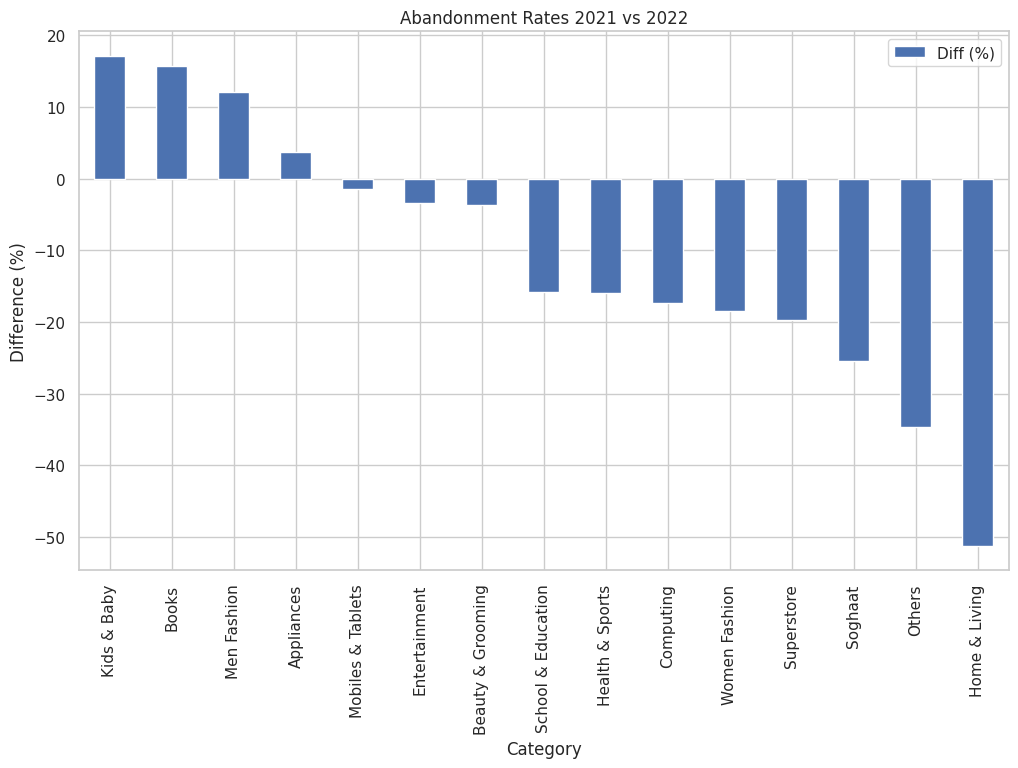

In [201]:
#Membuat grafik
customer_rate_diff.plot(x='category',
           y=['Diff (%)'],
           kind='bar',
           grid = True,
           title = 'Abandonment Rates 2021 vs 2022',
           xlabel = 'Category',
           ylabel = 'Difference (%)',
           figsize=(12,7),
           rot = 90,
           table = False,
           sort_columns = False,
           secondary_y = False)

In [202]:
# Mengsortir dataframe berdasarkan kolom Abandoment Rate 2022 (AR 2022)
customer_rate_sorted = customer_rate.sort_values(by='AR 2022')
customer_rate_sorted

,category,AR 2021,AR 2022,Diff (%)
14,Books,11.19,13.28,15.74
13,School & Education,16.97,14.66,-15.76
2,Soghaat,18.56,14.79,-25.49
9,Health & Sports,19.66,16.96,-15.92
6,Home & Living,25.95,17.16,-51.22
3,Beauty & Grooming,18.80,18.13,-3.70
0,Men Fashion,17.15,19.52,12.14
11,Kids & Baby,16.46,19.86,17.12
4,Women Fashion,24.05,20.31,-18.41
7,Superstore,33.23,27.76,-19.70


In [203]:
# Memilih 5 baris terastas berdasarkan kolom Abandonment Rate 2022 (AR 2022)
top5_customer_rate = customer_rate_sorted.tail(5)
top5_customer_rate

,category,AR 2021,AR 2022,Diff (%)
8,Others,40.34,29.95,-34.69
10,Computing,38.89,33.14,-17.35
1,Mobiles & Tablets,36.59,36.07,-1.44
5,Appliances,36.35,37.76,3.73
12,Entertainment,50.29,48.61,-3.46


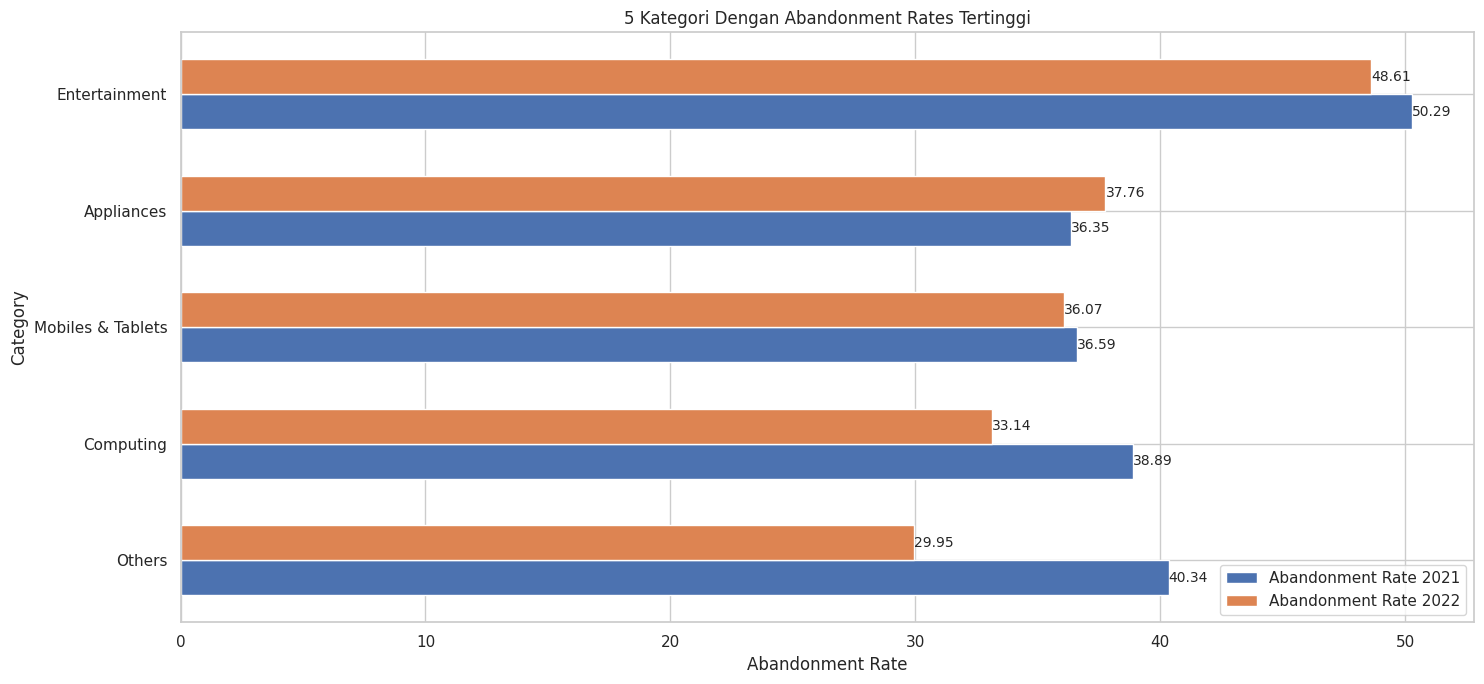

In [204]:
plt.figure(figsize=(15, 7))

y = range(len(top5_customer_rate))
bar_height = 0.3

bar1 = plt.barh(y, top5_customer_rate['AR 2021'], height=bar_height, label='Abandonment Rate 2021')
bar2 = plt.barh([val + bar_height for val in y], top5_customer_rate['AR 2022'], height=bar_height, label='Abandonment Rate 2022')

plt.ylabel('Category')
plt.xlabel('Abandonment Rate')
plt.title('5 Kategori Dengan Abandonment Rates Tertinggi')
plt.yticks([val + bar_height/2 for val in y], top5_customer_rate['category'])
plt.legend()

# Annotate the bars with their respective values
for bar in bar1:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}',
             va='center', ha='left', fontsize=10)

for bar in bar2:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}',
             va='center', ha='left', fontsize=10)

plt.tight_layout()

plt.show()

## Total Sales per Category per Year & Average Order per Category per Year

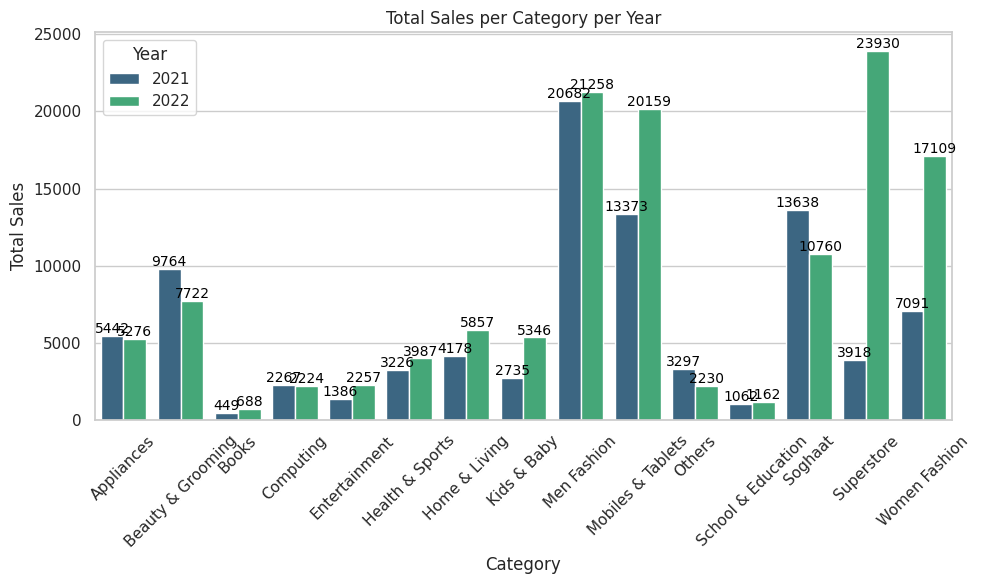

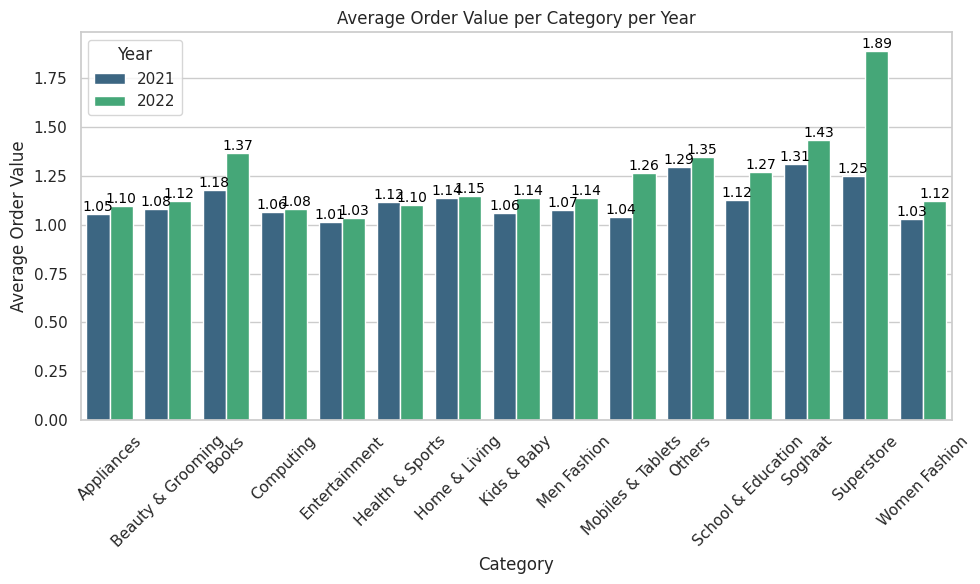

In [205]:
# Set the style
sns.set(style='whitegrid')

# Filter data by valid orders
valid_orders = df[df['is_valid'] == 1].copy()

# Extract year from order_date using .loc indexer
valid_orders.loc[:, 'year'] = valid_orders['order_date'].dt.year

# Plot total sales per category per year
plt.figure(figsize=(10, 6))
category_sales = valid_orders.groupby(['category', 'year'])['qty_ordered'].sum().reset_index()
ax = sns.barplot(data=category_sales, x='category', y='qty_ordered', hue='year', palette='viridis')
plt.title('Total Sales per Category per Year')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
#to show anotation
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

# Plot average order value per category per year
plt.figure(figsize=(10, 6))
category_aov = valid_orders.groupby(['category', 'year'])['qty_ordered'].mean().reset_index()
ax = sns.barplot(data=category_aov, x='category', y='qty_ordered', hue='year', palette='viridis')
plt.title('Average Order Value per Category per Year')
plt.xlabel('Category')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.legend(title='Year')
#to show anotation
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

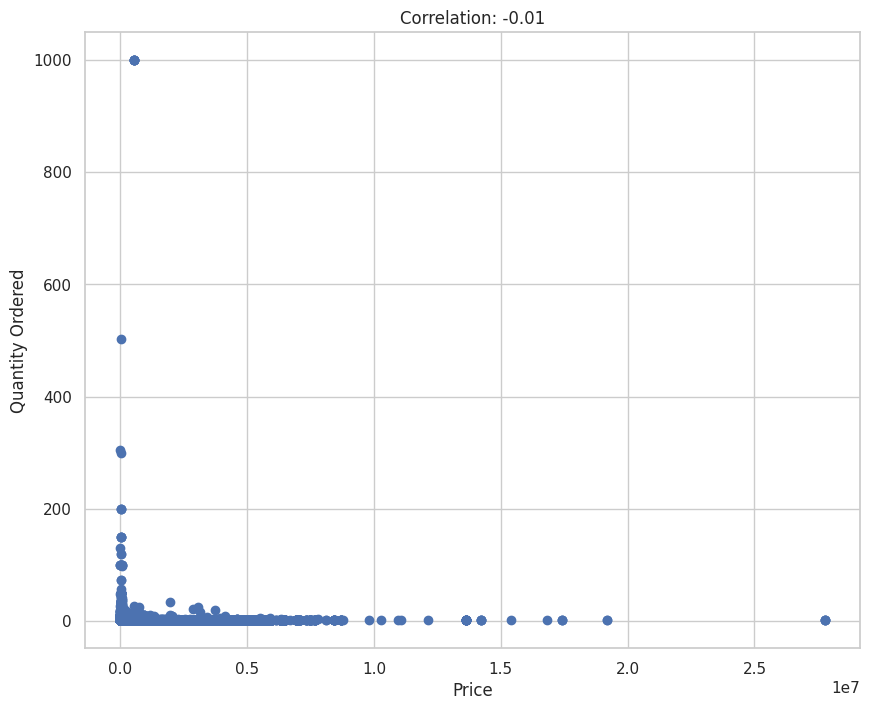

Correlation Coefficient: -0.01


In [206]:
# Calculate the correlation coefficient between 'price' and 'quantity ordered'
correlation_coefficient = df['price'].corr(df['qty_ordered'])

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['price'], df['qty_ordered'])
plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.title(f'Correlation: {correlation_coefficient:.2f}')
plt.show()

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

## Top 5 Category Make Most Profit (2021-2022)

### Melakukan Filter Data untuk Tabel yang akan Dianalisis

Data akan difilter hanya untuk data dengan traksaksi pada tahun 2021 - 2022 dan order telah dibayar dengan dibuktikan pada kolom 'is_valid' =1.

In [207]:
df_profit = df[\
                 #Filter untuk data Valid
                 (df['is_valid'] == 1) &\
                 #Filter untuk data order hanya dari tahun 2021 - 2022
                 ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= "2022-12-31"))]
df_profit.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100,0,113100,1,1,1,1,cod,kreations_YI 06-L,113100,92742,Women Fashion,2021-07-16
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740,0,30740,1,1,1,1,cod,BT_BT-422,30740,26738,Men Fashion,2021-07-28
5,ODR1386982371d,C226141L,2022-05-19,P721889,17342,1,17342,0,17342,1,1,1,1,cod,ALHAMRA_US-0961-K,17342,13514,Men Fashion,2021-07-28
6,ODR1386982371d,C226141L,2022-05-19,P528762,3828,1,3828,0,3828,1,1,1,1,cod,e-seller_7,3828,3248,Mobiles & Tablets,2021-07-28
7,ODR1386982371d,C226141L,2022-05-19,P240218,20300,1,20300,0,20300,1,1,1,1,cod,BD_BIG DEAL_16,20300,17458,Mobiles & Tablets,2021-07-28


### Menambahkan Kolom - Kolom yang Diperlukan

Kita akan membuat kolom profit untuk melakukan analisis terhadap profit dari category. Untuk mencari profit diperlukan cogsxqty yang berisi nilai dari cogs atau harga modal untuk suatu produk dikali dengan jumlah produk yang diorder.

In [208]:
df_profit['cogsxqty'] = df_profit['cogs'] * df_profit['qty_ordered']
df_profit.head()

<ipython-input-208-f624fbdd4565>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,cogsxqty
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100,0,113100,1,1,1,1,cod,kreations_YI 06-L,113100,92742,Women Fashion,2021-07-16,92742
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740,0,30740,1,1,1,1,cod,BT_BT-422,30740,26738,Men Fashion,2021-07-28,26738
5,ODR1386982371d,C226141L,2022-05-19,P721889,17342,1,17342,0,17342,1,1,1,1,cod,ALHAMRA_US-0961-K,17342,13514,Men Fashion,2021-07-28,13514
6,ODR1386982371d,C226141L,2022-05-19,P528762,3828,1,3828,0,3828,1,1,1,1,cod,e-seller_7,3828,3248,Mobiles & Tablets,2021-07-28,3248
7,ODR1386982371d,C226141L,2022-05-19,P240218,20300,1,20300,0,20300,1,1,1,1,cod,BD_BIG DEAL_16,20300,17458,Mobiles & Tablets,2021-07-28,17458


Kolom profit merupakan hasil dari kolom "after_discount" yang merupakan harga jual setelah dipotong discount, lalu dikurangi harga modal yaitu cogsxqty.

In [209]:
df_profit['profit'] = df_profit['after_discount'] - df_profit['cogsxqty']
df_profit.head()

<ipython-input-209-65f9e5053327>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,cogsxqty,profit
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100,0,113100,1,...,1,1,cod,kreations_YI 06-L,113100,92742,Women Fashion,2021-07-16,92742,20358
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740,0,30740,1,...,1,1,cod,BT_BT-422,30740,26738,Men Fashion,2021-07-28,26738,4002
5,ODR1386982371d,C226141L,2022-05-19,P721889,17342,1,17342,0,17342,1,...,1,1,cod,ALHAMRA_US-0961-K,17342,13514,Men Fashion,2021-07-28,13514,3828
6,ODR1386982371d,C226141L,2022-05-19,P528762,3828,1,3828,0,3828,1,...,1,1,cod,e-seller_7,3828,3248,Mobiles & Tablets,2021-07-28,3248,580
7,ODR1386982371d,C226141L,2022-05-19,P240218,20300,1,20300,0,20300,1,...,1,1,cod,BD_BIG DEAL_16,20300,17458,Mobiles & Tablets,2021-07-28,17458,2842


### Mencari 5 Category dengan Profit Terbesar Tahun 2021 - 2022

In [210]:
category_profit20212022 = pd.DataFrame(df_profit
                              #Pengelompokan berdasarkan kolom category serta melakukan sum pada kolom profit
                              .groupby(by="category")["profit"].sum()\
                              #Sorting data secara descending
                              .sort_values(ascending = False)\
                              .reset_index(name='profit_2021-2022'))
category_profit20212022

,category,profit_2021-2022
0,Mobiles & Tablets,2900997965
1,Appliances,766695539
2,Women Fashion,468746690
3,Entertainment,430104544
4,Men Fashion,396937157
5,Computing,192659376
6,Beauty & Grooming,140090142
7,Home & Living,113180661
8,Health & Sports,86104503
9,Superstore,78230831


In [211]:
#Mengambil 5 baris terastas
Top5Category2122 = category_profit20212022.head(5)
Top5Category2122

,category,profit_2021-2022
0,Mobiles & Tablets,2900997965
1,Appliances,766695539
2,Women Fashion,468746690
3,Entertainment,430104544
4,Men Fashion,396937157


Membuat plot dari tabal Top 5 Category untuk melakukan visualisa 5 Category dengan profit terbesar

In [212]:
# Menggunakan library plotly yang kita alias sebagai px untuk membuat barchart
Top5Category_plot = px.bar(\
                           #Dataframe yang akan kita visualisasi
                           Top5Category2122,
                           #Nilai X axis
                           x="profit_2021-2022",
                           #Nilai Y axis
                           y="category",
                           #Pemberian warna untuk variabel category
                           color="category",
                           #Memberikan orientasi karena kita ingin membuat horizontal bar char maka kita kasih nilai h
                           orientation='h',
                           #Judul Chart
                           title="TOP 5 Category Make Most Profit 2021-2022")
Top5Category_plot.show()

## Top 10 product make most profit from category make most profit(mobile and tablets) (2021-2022)

In [213]:
top10itemprofit = pd.DataFrame(df_profit\
                               #Filter untuk category : Mobile & Tablets
                               [(df_profit['category'] == 'Mobiles & Tablets')]\
                               #Mengelompokan Berdasarkan SKU Name
                               .groupby(by="sku_name")["profit"].sum()\
                               #Sorting Descending
                               .sort_values(ascending=False)\
                               #Mengambil 10 Baris Teratas
                               .head(10)\
                               .reset_index(name='profit'))
top10itemprofit

,sku_name,profit
0,IDROID_BALRX7-Jet black,151346677
1,Infinix Hot 4-Gold,110531823
2,Infinix Hot 4-Black,87699443
3,infinix_Zero 4-Grey,79319417
4,IDROID_BALRX7-Gold,69036034
5,IDROID_BALRX7-Jet black,61495407
6,Infinix Hot 4 Nationwide-Black,60714864
7,INFIINIX_HOT S X521,57726863
8,Infinix Hot 4 Nationwide-Gold,45718848
9,Apple iPhone 6S Plus 16GB Silver,43237956


In [214]:
top10itemplot = px.bar(\
                       #Dataframe
                       top10itemprofit,
                       #X axis
                       x="profit",
                       #Y axis
                       y="sku_name",
                       color="sku_name",
                       #Orientasi
                       orientation='h',
                       #Title
                       title="TOP 10 Item Can Make Most Profit From Mobile and Tablet 2021-2022")
top10itemplot.show()

## Top 5 products with the highest decrease growth order from the books category between 2021 and 2022

In [215]:
#Menyimpan data dalam bentuk Pandas DataFrame
quan_order21 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']==1) &\
                        (df['category']=='Books') &\
                      #Memfilter data pada transaksi selama 2021
                      ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                     #Mengelompokan data berdasarkan nama produk
                     .groupby(by=['sku_name'])['qty_ordered']\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data berdasarkan nilai kuantitas paling banyak
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='Quantity Order (2021)'))
quan_order21

,sku_name,Quantity Order (2021)
0,Topline_Waheed Murad His Life and Our Times,91
1,liberty_9780751565355,72
2,Harry Potter and The Cursed Child-Hazir-Karachi,21
3,Zia_147P,10
4,Paramount_9781910561324,8
...,...,...
183,Progressive_9788131919460,1
184,Progressive_9788131933541,1
185,Progressive_9788131936399,1
186,RBC_9789694070872,1


In [216]:
#Menyimpan data dalam bentuk Pandas DataFrame
quan_order22 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']==1) &\
                        (df['category']=='Books') &\
                        #Memfilter data pada transaksi selama 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     #Mengelompokan data berdasarkan nama produk
                     .groupby(by=['sku_name'])['qty_ordered']\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data berdasarkan nilai kuantitas paling banyak
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='Quantity Order (2022)'))
quan_order22

,sku_name,Quantity Order (2022)
0,Bahr-e-Shifa,292
1,Paramount_9789696372639,33
2,Topline_Waheed Murad His Life and Our Times,12
3,Zia_133,10
4,Tmaster_C D Rom,8
...,...,...
232,Progressive_9788131908808,1
233,Progressive_9788131908822,1
234,Progressive_9788131908839,1
235,Progressive_9788131908860,1


In [217]:
#Menggabungkan data
quan_growth = quan_order21.merge(quan_order22, left_on = 'sku_name', right_on = 'sku_name')
quan_growth['Growth (%)']=quan_growth['Quantity Order (2022)']-quan_growth['Quantity Order (2021)']
quan_growth.sort_values(by=['Growth (%)'],ascending=True,inplace=True)
quan_growth = quan_growth.head(5)
quan_growth

,sku_name,Quantity Order (2021),Quantity Order (2022),Growth (%)
0,Topline_Waheed Murad His Life and Our Times,91,12,-79
1,Zia_147P,10,3,-7
2,Paramount_9781910561324,8,1,-7
4,Paramount_9780600617433,5,1,-4
7,Zia_SS12,4,1,-3


In [218]:
# memilih kolom data yang diinginkan
quantity_growth = quan_growth[['sku_name', 'Growth (%)']]
quantity_growth

,sku_name,Growth (%)
0,Topline_Waheed Murad His Life and Our Times,-79
1,Zia_147P,-7
2,Paramount_9781910561324,-7
4,Paramount_9780600617433,-4
7,Zia_SS12,-3


In [219]:
# membuat visualisasi
quantity_growth_plot = px.bar(\
                              quantity_growth,
                              x='sku_name',
                              y='Growth (%)',
                              color='Growth (%)',
                              orientation='v',
                              title='Top 5 Product with The Highest Decrease Growth Order from The Books Category between 2021 and 2022'
                              )
quantity_growth_plot.show()

## Distribution based on RFM Segmentation

RFM stands for the three dimensions:

*   Recency – How recently did the customer purchase?
*   Frequency – How often do they purchase?
*   Monetary Value – How much do they spend?

### Feature Engineering

In [220]:
# Menambahkan kolom grand total
def calculate_grand_total(row):
    total_before_discount = row['price'] * row['qty_ordered']
    grand_total = total_before_discount - row['discount_amount'] if total_before_discount - row['discount_amount'] >= 0 else total_before_discount
    return grand_total

def calculate_discount_amount(row):
    total_before_discount = row['price'] * row['qty_ordered']
    discount_amount = 0 if total_before_discount - row['discount_amount'] >= 0 else row['discount_amount']
    return discount_amount

# Menerapkan fungsi calculate_grand_total ke setiap baris di DataFrame
df['grand_total'] = df.apply(calculate_grand_total, axis=1)

# Menerapkan fungsi calculate_discount_amount ke setiap baris di DataFrame
df['discount_amount'] = df.apply(calculate_discount_amount, axis=1)


In [221]:
# Menggunakan clean_df dataframe untuk memudahkan feature engineering pada RFM Segmentation
clean_df = df
clean_df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,grand_total
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100,0,113100,1,1,1,1,cod,kreations_YI 06-L,113100,92742,Women Fashion,2021-07-16,113100
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920,0,13920,1,0,0,1,cod,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,13920,10266,Beauty & Grooming,2021-07-15,13920
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660,0,15660,1,0,0,2,jazzvoucher,RS_Habshi Halwa Tin,15660,12992,Soghaat,2021-07-15,15660
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100,0,142100,1,0,0,1,cod,Ego_UP0017-999-MR0,142100,85260,Women Fashion,2021-07-28,142100
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740,0,30740,1,1,1,1,cod,BT_BT-422,30740,26738,Men Fashion,2021-07-28,30740


In [222]:
# Membuat rfm dataframe
columns_to_copy = ['customer_id']

# Copy kolom customer_id ke dataframe rfm
rfm = df[columns_to_copy].copy()
rfm.head()

,customer_id
0,C269125L
1,C693630L
2,C693630L
3,C226141L
4,C226141L


### RFM Segementation

In [223]:
# Recency calculation
recency_cte = clean_df.groupby('customer_id')['registered_date'].max().reset_index()
recency_cte.rename(columns={'registered_date': 'MaxDate'}, inplace=True)
recency_cte['recency'] = (pd.to_datetime('2022-12-31') - pd.to_datetime(recency_cte['MaxDate'])).dt.days

recency_cte.head()

,customer_id,MaxDate,recency
0,C100446L,2022-08-08,145
1,C101415L,2022-08-25,128
2,C101909L,2022-08-05,148
3,C102177L,2022-08-16,137
4,C102851L,2022-08-15,138


In [224]:
# Frequency calculation
frequency_cte = clean_df.groupby('customer_id').size().reset_index(name='frequency')

frequency_cte.head()

,customer_id,frequency
0,C100446L,1
1,C101415L,3
2,C101909L,8
3,C102177L,2
4,C102851L,1


In [225]:
# Monetary calculation
monetary_cte = clean_df.groupby('customer_id')['grand_total'].sum().reset_index(name='monetary')

monetary_cte.head()

,customer_id,monetary
0,C100446L,40542
1,C101415L,140450
2,C101909L,35327
3,C102177L,202826
4,C102851L,63742


In [226]:
# Menggabungkan DataFrame gabungan dengan rfm
rfm = rfm.merge(recency_cte[['customer_id', 'recency']], on='customer_id', how='left')
rfm = rfm.merge(frequency_cte[['customer_id', 'frequency']], on='customer_id', how='left')
rfm = rfm.merge(monetary_cte[['customer_id', 'monetary']], on='customer_id', how='left')

rfm.head()

,customer_id,recency,frequency,monetary
0,C269125L,533,1,113100
1,C693630L,534,2,29580
2,C693630L,534,2,29580
3,C226141L,521,5,214310
4,C226141L,521,5,214310


In [227]:
# Recency quartiles calculation
recency_quartiles = rfm['recency'].quantile([0.01, 0.05, 0.09, 0.2])

In [228]:
# Frequency quartiles calculation
frequency_quartiles = rfm['frequency'].quantile([0.4, 0.6, 0.8, 0.9])

In [229]:
# Monetary quartiles calculation
monetary_quartiles = rfm['monetary'].quantile([0.4, 0.6, 0.8, 0.9])

In [230]:
# Recency score calculation
rfm['score'] = pd.cut(rfm['recency'], bins=[-1, 101, 134, 155, 219, float('inf')],
                      labels=['5', '4', '3', '2', '1'], right=False).astype(str)

rfm.head()

,customer_id,recency,frequency,monetary,score
0,C269125L,533,1,113100,1
1,C693630L,534,2,29580,1
2,C693630L,534,2,29580,1
3,C226141L,521,5,214310,1
4,C226141L,521,5,214310,1


In [231]:
# Frequency score calculation
rfm['score'] += pd.cut(rfm['frequency'], bins=[-1, 1, 2, 3, 5, float('inf')],
                       labels=['1', '2', '3', '4', '5'], right=False).astype(str)

rfm.head()

,customer_id,recency,frequency,monetary,score
0,C269125L,533,1,113100,12
1,C693630L,534,2,29580,13
2,C693630L,534,2,29580,13
3,C226141L,521,5,214310,15
4,C226141L,521,5,214310,15


In [232]:
# Monetary score calculation
rfm['score'] += pd.cut(rfm['monetary'], bins=[-1, 1300, 2988.4, 11130, 22999, float('inf')],
                       labels=['1', '2', '3', '4', '5'], right=False).astype(str)

rfm.head()

,customer_id,recency,frequency,monetary,score
0,C269125L,533,1,113100,125
1,C693630L,534,2,29580,135
2,C693630L,534,2,29580,135
3,C226141L,521,5,214310,155
4,C226141L,521,5,214310,155


In [233]:
# Customer Segmentation Calculation
segmentation_mapping = {
    (555, 554, 544, 545, 454, 455, 445): 'Champion',
    (543, 444, 435, 355, 354, 345, 344, 335): 'Loyal_Customer',
    (553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323): 'Potential_Loyalist',
    (512, 511, 422, 421, 412, 411, 311 ): 'New_Customer',
    (525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313): 'Promising',
    (535, 534, 443, 434, 343, 334, 325, 324): 'Need_Attention',
    (155, 154, 144, 214,215,115, 114, 113): 'Cannot_Lose_Them',
    (331, 321, 312, 221, 21): 'About_To_Sleep',
    (255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124): 'At_Risk',
    (332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211): 'Hibernating',
    (111, 112, 121, 131, 141, 151): 'Lost'
}

def assign_segment(score):
    for key, value in segmentation_mapping.items():
        if int(score) in key:
            return value
    return 'Unknown'

rfm['type'] = rfm['score'].apply(assign_segment)

In [234]:
# Check segmentation maping sudah berjalan
rfm['type'].unique()

array(['At_Risk', 'Cannot_Lose_Them', 'Lost', 'Hibernating',
       'About_To_Sleep', 'Loyal_Customer', 'Need_Attention', 'Promising',
       'Champion', 'Potential_Loyalist', 'New_Customer'], dtype=object)

In [235]:
# Check final rfm dataframe
rfm.head()

,customer_id,recency,frequency,monetary,score,type
0,C269125L,533,1,113100,125,At_Risk
1,C693630L,534,2,29580,135,At_Risk
2,C693630L,534,2,29580,135,At_Risk
3,C226141L,521,5,214310,155,Cannot_Lose_Them
4,C226141L,521,5,214310,155,Cannot_Lose_Them


In [236]:
# Sorting customer type
type_counts = pd.DataFrame(rfm['type'].value_counts())
type_counts

,type
Cannot_Lose_Them,160536
At_Risk,83399
Loyal_Customer,2544
Hibernating,1503
Champion,821
Need_Attention,633
Lost,521
Promising,295
Potential_Loyalist,131
About_To_Sleep,110


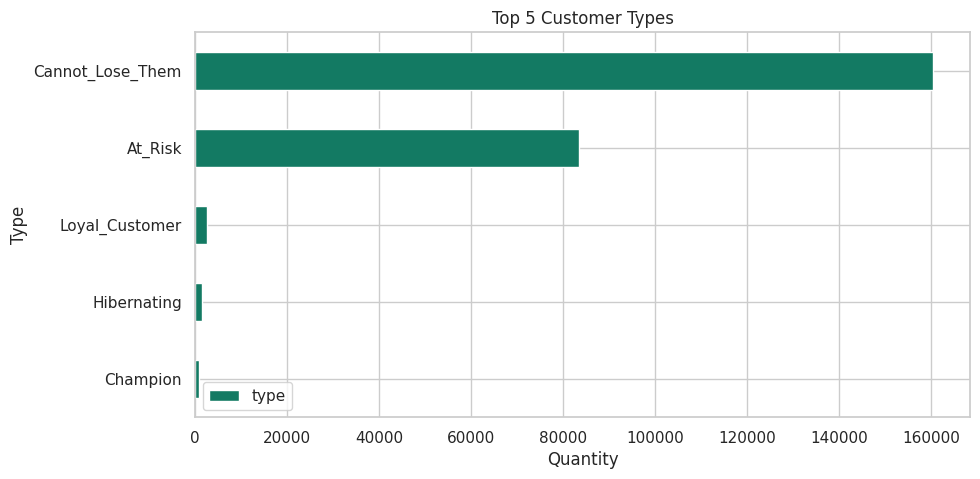

In [237]:
# Select the top 5 types
top_types = type_counts.head(5)
top_types.head()

# Create a horizontal bar chart
ax = top_types.plot(kind='barh', figsize=(10, 5), color='#137a63')

# Set labels and title
ax.set_xlabel('Quantity')
ax.set_ylabel('Type')
ax.set_title('Top 5 Customer Types')

# Invert y-axis to have the highest count at the top
ax.invert_yaxis()

# Display the plot
plt.show()


**Analisa 5 Tipe Customer Teratas**

1. Tipe customer terbanyak adalah **Cannot_Lose_Them** sebanyak **160,536** customers, ini tergolong banyak jika dibandingkan dengan total keseluruhan customer. Tipe customer ini adalah mereka yang memiliki skor Recency dan Monetary Value yang tinggi, tetapi mungkin memiliki skor Frequency yang rendah. Ini berarti mereka baru-baru ini melakukan pembelian yang signifikan, tetapi mungkin tidak sering berbelanja. Karena mereka berkontribusi pada pendapatan yang besar, penting untuk menjaga hubungan dengan mereka dan mungkin merancang strategi untuk memastikan mereka tetap tertarik.

2. Kedua, adalah customer yang berada dalam kategori **At_Risk** sebanyak **83,399** customers. Customer dalam kategori ini mungkin memiliki skor rendah dalam semua kategori RFM, menunjukkan bahwa mereka tidak melakukan pembelian baru-baru ini (Recency rendah), tidak berbelanja secara teratur (Frequency rendah), dan mungkin menghabiskan sedikit (Monetary Value rendah). Mereka cenderung berada dalam risiko beralih ke pesaing atau berhenti berbelanja sama sekali. Strategi yang melibatkan penawaran khusus melalui pop-up notification maupun e-mail dan upaya personalisasi bisa membantu menghidupkan kembali minat mereka.

3. Ketiga, adalah customer yang berada dalam kategori **Loyal_Customer** sebanyak **2,544** customers. Tipe customer ini memiliki skor tinggi dalam semua kategori RFM. Mereka baru-baru ini berbelanja (Reecency tinggi), berbelanja secara teratur (Frequency tinggi), dan menghabiskan uang dengan jumlah yang signifikan (Moneter Value tinggi). Mereka adalah aset berharga bagi perusahaan, maka kita perlu dan perlu memberikan perhatian khusus agar customer dalam kategori ini tetap puas dan setia.


4. Keempat, adalah customer yang berada dalam kategori **Hibernating** sebanyak **1,503** customers. Tipe customer ini memiliki skor rendah dalam Recency dan Frequency, tetapi memiliki Monetary Value yang tinggi. Ini menunjukkan bahwa mereka pernah berbelanja dengan nilai yang besar di masa lalu, tetapi telah mengurangi aktivitas pembelian mereka. Kita dapat melakukan customer engangemnet dengan tawaran menarik dan melakukan strategi pengaktifan untuk membantu menghidupkan kembali minat mereka.

5. Kelima, adalah customer yang berada dalam kategori **Champion** sebanyak **821** customers. Tipe customer ini memiliki skor tinggi dalam semua kategori RFM. Mereka baru-baru ini berbelanja dengan frekuensi tinggi dan menghabiskan jumlah uang yang besar. Mereka adalah pelanggan yang sangat berharga dan berkontribusi besar terhadap perusahaan. Merawat hubungan dengan pelanggan tipe ini penting untuk mempertahankan tingkat aktivitas pembelian mereka yang tinggi.

Maka guna memberikan strategi yang on-point, kita akan melakukan analisa distribusi terhadap customer dari masing-masing tipe berdasarkan payment method dan product category.

### Interactive Dashboard

**Note:**
Install this dependencies before running the cell if the interactive dashboard doesn't running well in your environment:
*   `pip install plotly`
*   `pip install hvplot`
*   `pip install panel`

In [238]:
# Dropdown widget
dropdown_options = {t: t for t in rfm['type'].unique()}
dropdown = pn.widgets.Select(name='Select Customer Type:', options=dropdown_options)

# Function to update plots
def update_plots(selected_type):
    filtered_rfm = rfm[rfm['type'] == selected_type]
    filtered_clean_df = clean_df[clean_df['customer_id'].isin(filtered_rfm['customer_id'])]

    total_spend = filtered_rfm['monetary'].sum()
    total_customers = filtered_rfm.shape[0]

    payment_counts = filtered_clean_df['payment_method'].value_counts()

    # Create a treemap chart for payment method distribution
    treemap_chart = go.Figure(go.Treemap(
        labels=payment_counts.index,
        parents=['' for _ in payment_counts.index],
        values=payment_counts.values,
        textinfo='label+value+percent entry',
        branchvalues='total'  # Use 'total' branch values to sum up values
    ))
    treemap_chart.update_layout(
        title='Payment Method Distribution',
        height=600,
        width=800,
        font=dict(family='Montserrat', size=12, color='white'),  # Set font properties
        paper_bgcolor='#0a3a2a',  # Background color
        plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot area
        treemapcolorway=['#6b705c', '#b7b7a4', '#ffe8d6', '#ddbea9', '#cb997e'],  # Custom color palette
    )

    category_counts = filtered_clean_df['category'].value_counts()

    # Create a bubble chart for product category distribution
    bubble_chart = px.scatter(x=category_counts.index, y=category_counts.values, size=category_counts.values,
                              title='Product Category Distribution', size_max=50,
                              color=category_counts.values, color_continuous_scale='Darkmint')
    bubble_chart.update_layout(
        font=dict(family='Montserrat', size=12, color='white'),
        paper_bgcolor='#0a3a2a',  # Background color
        height=600,
        width=800,
        xaxis_title="Category",
        yaxis_title="Quantity"
    )
    bubble_chart.update_traces(
        text=category_counts.index,
        texttemplate='%{text}<br>Quantity: %{marker.size}',
        hovertemplate='%{text}<br>Quantity: %{marker.size}'
    )

    return total_spend, total_customers, treemap_chart, bubble_chart

# Create Panel components
total_spend_text = pn.widgets.StaticText(value='', name='Total Spend')
total_customers_text = pn.widgets.StaticText(value='', name='Total Customers')
treemap_chart_pane = pn.pane.Plotly(name='Payment Method Distribution')
bubble_chart_pane = pn.pane.Plotly(name='Product Category Distribution')

# Callback for dropdown change
def dropdown_change(event):
    selected_type = event.new
    total_spend, total_customers, treemap_chart, bubble_chart = update_plots(selected_type)
    total_spend_text.value = f'{total_spend:,}'
    total_customers_text.value = f'{total_customers:,}'
    treemap_chart_pane.object = treemap_chart
    bubble_chart_pane.object = bubble_chart

# Link the callback to the dropdown value using the param attribute
dropdown.param.watch(dropdown_change, 'value')

# Assemble the layout
layout = pn.Column(dropdown, total_spend_text, total_customers_text, treemap_chart_pane, bubble_chart_pane)
layout.servable()


Column
    [0] Select(options={'At_Risk': 'At_Risk', ...}, value='At_Risk')
    [1] StaticText(name='Total Spend')
    [2] StaticText(name='Total Customers')
    [3] Plotly(None, name='Payment Method D...)
    [4] Plotly(None, name='Product Category D...)

### Strategi Planning for Valueable Customers berdasarkan 3 Payment Method terbanyak  

**1. Cannot_Lose_Them**
* **COD:**
<br>Personalized Delivery: Menawarkan pengiriman yang fleksibel dan sesuai jadwal pelanggan, sertakan catatan khusus pada pengiriman.
<br>Next Discount: Memberikan diskon khusus untuk pembelian berikutnya jika menggunakan metode pembayaran COD.

* **Payaxis:**
<br>Reward Points: Memberikan poin reward khusus setiap kali pelanggan menggunakan Payaxis, yang bisa ditukarkan dengan diskon atau hadiah.
<br>Exclusive Promotions: Mengirimkan penawaran eksklusif hanya untuk pengguna Payaxis, mendorong mereka untuk tetap aktif.
* **Jazzwallet:**
<br>Loyalty Program: Memberikan poin atau gift untuk setiap transaksi melalui Jazzwallet.
<br>Customized Offers: Mengirimkan penawaran yang sesuai dengan riwayat pembelian pelanggan melalui Jazzwallet.

<br>

**2. At_Risk**
* **COD:**
<br>Special Discounts: Menawarkan diskon eksklusif untuk pembelian melalui COD, memberikan insentif tambahan untuk tetap berbelanja.
<br>Personalized Reminders: Mengirimkan pesan terpersonalisasi yang mengingatkan customer akan manfaat dan kemudahan menggunakan COD.
* **Payaxis:**
<br>Spesial Offers: Mengirimkan penawaran khusus atau diskon ekstra kepada mereka yang menggunakan Payaxis, mendorong mereka untuk kembali aktif.
<br>Purchase Recovery: Mengirimkan pengingat dan penawaran eksklusif untuk produk yang diminati customer (atau produk dalam keranjang) melalui Payaxis.
* **Jazzwallet:**
<br>Cashback Bonus: Memberikan cashback atau penghargaan khusus untuk setiap transaksi melalui Jazzwallet, untuk meningkatkan minat mereka.
<br>Persuasive Message: Mengirimkan pesan yang meyakinkan tentang keuntungan menggunakan Jazzwallet, serta menawarkan insentif tambahan.

<br>

**3. Loyal_Customer**
* **COD:**
<br>Continued Convenience: Mempertahankan kualitas pelayanan COD yang luar biasa untuk mempertahankan tingkat kepuasan tinggi yang telah customer rasakan.
<br>Surprise Gifting: Menyisipkan bonus atau tawaran mengejutkan dalam pesanan COD customer sebagai bentuk penghargaan.

* **Payaxis:**
<br>Privileges Program: Memberikan early access ke penjualan atau produk baru hanya untuk pengguna Payaxis yang setia.
<br>Special Discounts: Memberikan diskon eksklusif sebagai apresiasi atas penggunaan konsisten mereka terhadap Payaxis.

* **Easypay:**
<br>Priority Services: Menawarkan layanan prioritas atau dukungan khusus kepada pelanggan setia setia Easypay.
<vr>Reward Points: Memberikan poin reward setiap kali mereka menggunakan Easypay, yang dapat ditukarkan dengan hadiah atau diskon.

<br>

**4. Hibernating**
* **COD:**
<br>Special Offers: Mengirimkan tawaran diskon khusus melalui COD sebagai dorongan untuk mereka berbelanja lagi
<br>Post-Purchase Follow-up: Melakukan follow-up pasca pembelian dengan mengirimkan pesan ucapan terima kasih dan undangan untuk memberikan feedback.

* **Payaxis:**
<br>Reactivation Discounts: Menawarkan diskon besar untuk pembelian pertama menggunakan Payaxis setelah jangka waktu tertentu.
<br>Reminder Messages: Mengirimkan pesan yang mengingatkan customer tentang manfaat menggunakan Payaxis dan potensi diskon yang bisa didapatkan.

* **Jazzwallet:**
<br>Reactivation Cashback: Menawarkan cashback atau bonus khusus untuk transaksi pertama melalui Jazzwallet setelah masa hibernasi.
<br>Exclusive Offers: Mengirimkan penawaran produk terbaru atau eksklusif hanya untuk pengguna Jazzwallet yang telah lama tidak berbelanja.

<br>

**5. Champion**
* **COD:**
<br>Plus Priveledges: Menawarkan layanan COD dengan tambahan keistimewaan, seperti pengiriman lebih cepat atau hadiah eksklusif.
<br>Loyalty Discounts: Memberikan diskon reguler atau bonus produk pada pembelian berikutnya melalui COD.

* **Payaxis:**
<br>VIP Rewards: Memberikan status VIP kepada pengguna Payaxis yang telah menjadi pelanggan "Champion," dengan poin reward ekstra dan penawaran eksklusif.
<br>Tawaran Khusus: Mengirimkan penawaran spesial hanya untuk pengguna Payaxis yang memiliki status "Champion."

* **Jazzwallet:**
<br>Exclusive Levels: Menawarkan level keanggotaan eksklusif dalam Jazzwallet dengan manfaat khusus, seperti cashback yang lebih tinggi atau akses awal ke penawaran.
<br>Premium Promotions: Mengirimkan promosi premium hanya untuk pengguna Jazzwallet "Champion" sebagai bentuk apresiasi.

<br>

### Strategi Planning for Valueable Customers berdasarkan 3 Product Category terbanyak

**1. Cannot_Lose_Them**
* **Men Fashion:**
<br>Exclusive Offering: Mengirimkan tawaran khusus untuk produk fashion pria yang sesuai dengan preferensi mereka, seperti diskon atau bundling produk.
<br>Fashion Update: Mengusahakan customer untuk tetap update dengan tren terbaru dan mengirimkan informasi tentang koleksi fashion pria terkini yang mereka mungkin mereka minati.
<br>Loyalty Points: Memberikan poin loyalitas khusus setiap kali mereka membeli produk fashion pria, yang dapat ditukarkan dengan diskon atau hadiah lainnya.

* **Mobiles & Tablets:**
<br>Early Access: Memberikan early access untuk penjualan ponsel dan tablet terbaru kepada pelanggan ini, sebagai bentuk apresiasi atas kesetiaan mereka.
<br>Trade-in Program: Menawarkan program trade-in yang memungkinkan mereka menukarkan perangkat lama dengan diskon pada pembelian perangkat baru.
<br>Gadget Tips: Mengirimkan tips dan trik terkait penggunaan ponsel dan tablet, serta informasi terbaru tentang fitur-fitur terbaru.

* **Superstore:**
<br>Personalized Bundles: Membuat bundling produk yang relevan dengan pembelian sebelumnya dan tawarkan diskon khusus.
<br>Loyalty Coupons: Memberikan kupon loyalitas yang dapat digunakan di berbagai departemen toko, mendorong mereka untuk menjelajahi beragam produk.
<br>Preview Promotions: Memberikan preview promosi yang akan datang di berbagai bagian toko untuk tetap membuat mereka tertarik.

<br>

**2. At_Risk**
* **Mobiles & Tablets:**
<br>Exclusive Upgrade Offers: Menawarkan tawaran khusus untuk meng-upgrade perangkat mereka dengan model terbaru, dengan diskon atau bonus khusus.
<br>Trade-in Incentives: Membuat program trade-in yang memberikan nilai khusus untuk perangkat lama mereka saat membeli yang baru.
<br>Limited-Time Deals: Mengirimkan penawaran terbatas waktu untuk ponsel dan tablet dengan harga istimewa.

* **Men Fashion:**
<br>Reactivation Discount: Memberikan diskon besar untuk pembelian pertama dalam jangka waktu tertentu, sebagai tindakan mengaktifkan kembali minat mereka.
<br>New Collection Showcase: Mengirimkan tampilan awal koleksi fashion pria terbaru dan tawarkan diskon pada produk dalam koleksi tersebut.
<br>Combo Deals: Menawarkan bundling produk fashion pria dengan harga istimewa untuk mendorong pembelian lebih banyak.

* **Women Fashion:**
<br>Personalized Recommendations: Mengirimkan rekomendasi produk fashion wanita yang sesuai dengan preferensi mereka, serta diskon tambahan.
<br>Fashion Tips: Membagikan panduan fashion dan inspirasi gaya untuk mendorong minat mereka kembali.
<br>Flash Sales: Memberikan flash sale pada koleksi fashion wanita dengan harga menarik.

<br>

**3. Loyal_Customer**
* **Men Fashion:**
<br>Exclusive Previews: Memberikan early access ke koleksi fashion pria terbaru kepada pelanggan setia sebagai bentuk apresiasi.
<br>VIP Discounts: Memberikan diskon eksklusif pada produk fashion pria untuk pelanggan yang telah membuktikan kesetiaannya.
<br>Personalized Styling: Menawarkan layanan personal shopper atau penasihat gaya untuk membantu mereka menemukan pilihan terbaik.

* **Women Fashion:**
<br>Early Access: Menyediakan early access ke koleksi fashion wanita terbaru untuk pelanggan loyal.
<br>Special Event Invitations: Mengundang customer ke acara khusus atau fashion show sebagai hadiah atas kesetiaan mereka.
<br>Customized Lookbooks: Mengirimkan panduan gaya khusus dengan kombinasi produk untuk membantu mereka menciptakan tampilan yang sempurna.

* **Mobiles & Tablets:**
<br>Exclusive Upgrades: Memberikan kesempatan untuk meng-upgrade perangkat dengan model terbaru dengan diskon atau penawaran khusus.
<br>Loyalty Rewards: Memberikan poin reward setiap kali mereka membeli perangkat baru yang dapat ditukarkan dengan hadiah lain.
<br>Tech Workshops: Menyediakan lokakarya teknologi eksklusif untuk pelanggan setia tentang cara optimal menggunakan perangkat mereka.

<br>

**4. Hibernating**
* **Mobiles & Tablets:**
<br>Revival Offers: Mengirimkan penawaran khusus untuk ponsel dan tablet terbaru dengan diskon atau bonus aksesori.
<br>Upgrade Reminders: Mengingatkan customer tentang manfaat meng-upgrade perangkat mereka dengan model terbaru dengan penawaran spesial.
<br>Limited-Time Deals: Memberikan penawaran terbatas waktu untuk produk-produk populer di kategori ini.

* **Soghaat (Gifts/Souvenirs):**
<br>Seasonal Gifting: Mengirimkan rekomendasi untuk hadiah musiman atau acara khusus yang mungkin menarik minat mereka.
<br>Personalized Gifting: Menawarkan opsi personalisasi pada produk-produk Soghaat sebagai cara yang unik untuk memikat mereka kembali.
<br>Discounted Bundles: Menawarkan bundling produk Soghaat dengan harga istimewa untuk mendorong pembelian lebih besar.

* **Men Fashion:**
<br>Welcome Back Discount: Mengirimkan diskon khusus untuk pembelian pertama mereka setelah masa hibernasi.
<br>Fashion Updates: Memberikan update terbaru tentang tren fashion pria dan tawarkan diskon pada produk terkini.
<br>Curated Outfits: Menyediakan opsi pilihan outfit yang telah disusun untuk memudahkan pembelian.

<br>

**5. Champion**
* **Superstore:**
<br>VIP Privileges: Menawarkan akses eksklusif ke bagian-bagian tertentu di toko atau penawaran khusus pada produk tertentu.
<br>Enhanced Loyalty Rewards: Meningkatkan poin loyalitas untuk setiap pembelian di berbagai departemen Superstore.
<br>Early Sales Access: Memberikan pelanggan "Champion" early access ke penjualan besar-besaran atau promosi toko.

* **Women Fashion:**
<br>Designer Collaborations: Menawarkan koleksi pakaian pria hasil kolaborasi dengan desainer terkenal, eksklusif untuk pelanggan "Champion".
<br>Custom Tailoring: Memberikan layanan jahit pakaian kustom untuk memenuhi preferensi gaya dan ukuran mereka.
<br>Exclusive Fashion Events: Mengundang customer ke acara fashion eksklusif untuk melihat koleksi terbaru dan mendapatkan produk sebelum pelanggan lain.

* **Men Fashion:**
<br>Runway Previews: Memberikan pelanggan "Champion" akses ke preview  koleksi fashion wanita terbaru melalui acara runway digital.
<br>Personal Styling Consultations: Menyediakan sesi konsultasi gaya pribadi untuk membantu mereka memilih pakaian sesuai dengan gaya dan tubuh mereka.
<br>Luxury Fashion Showcases: Mengundang customer ke acara fashion mewah dengan koleksi dari merek-merek high-end.

